In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [36]:
df = pd.read_csv('modified.csv')

In [37]:
df.dropna(inplace=True)

In [38]:
print(df.shape)

(56420, 22)


In [39]:
print(df.dtypes)

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


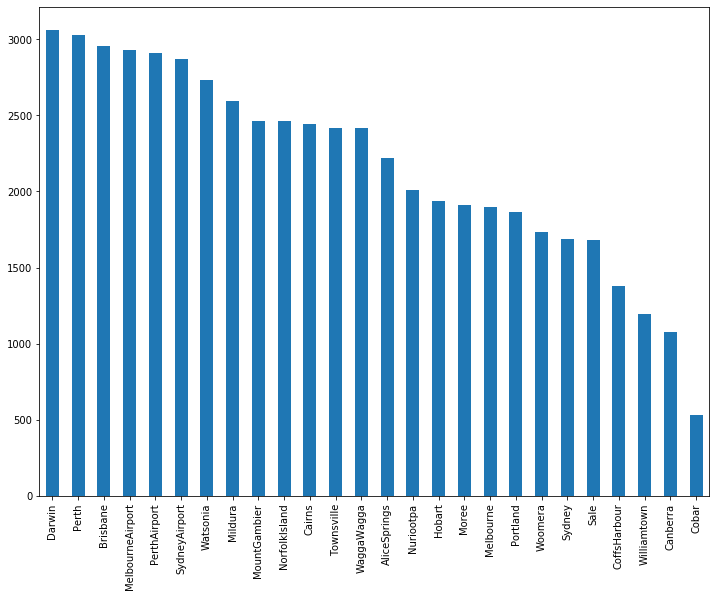

In [40]:
loc=df['Location']
loc.value_counts().plot(kind = 'bar',figsize = (12,9))

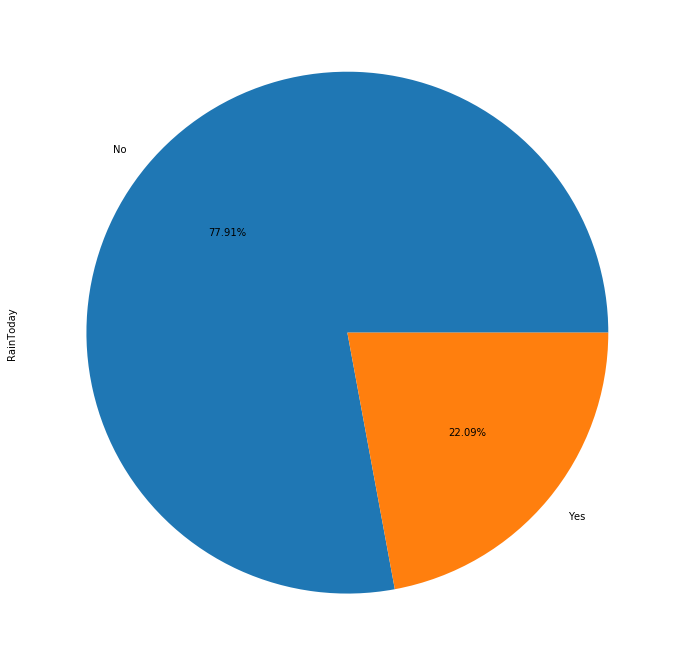

In [41]:
race_series = df['RainToday'].value_counts().plot(kind = 'pie',figsize = (12,12), autopct='%.2f%%')


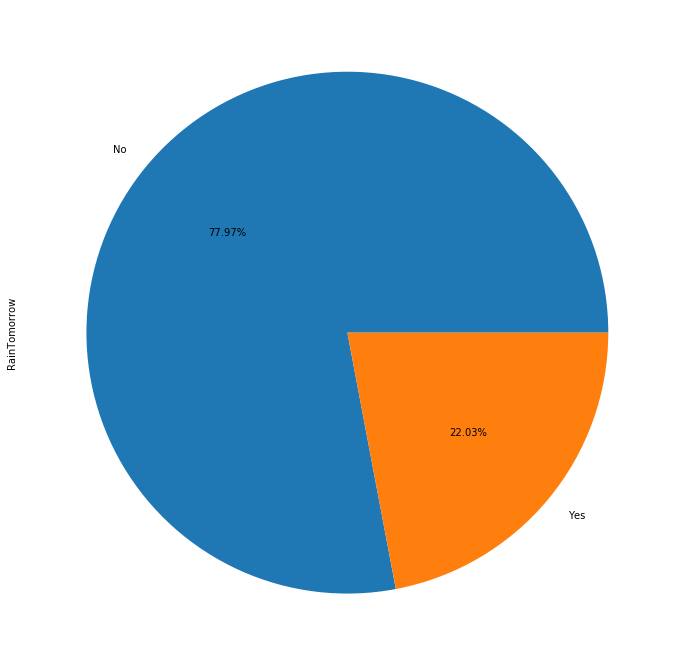

In [42]:
race_series = df['RainTomorrow'].value_counts().plot(kind = 'pie',figsize = (12,12), autopct='%.2f%%')

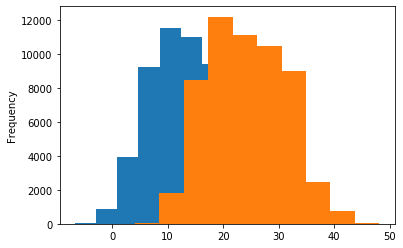

In [43]:
df['MinTemp'].plot(kind = 'hist')
df['MaxTemp'].plot(kind = 'hist')

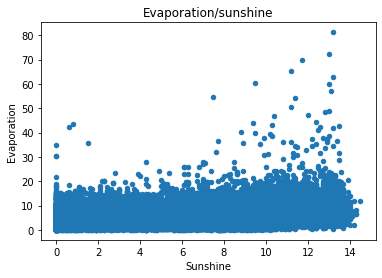

In [44]:
df.plot.scatter(x='Sunshine', y='Evaporation', title='Evaporation/sunshine')


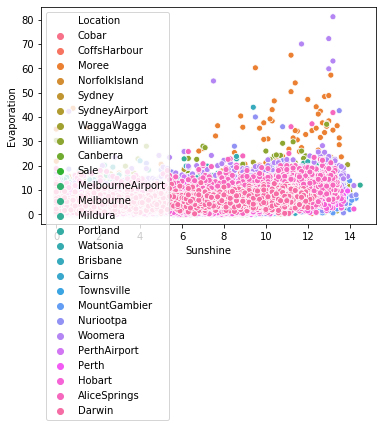

In [45]:
sns.scatterplot(x='Sunshine', y='Evaporation', hue='Location', data=df)

In [46]:
#df['Rainfall'].round(1)

5939      0.0
5940      0.0
5942      0.0
5943      0.0
5944      0.0
         ... 
139108    0.0
139109    0.0
139110    0.0
139111    0.0
139112    0.0
Name: Rainfall, Length: 56420, dtype: float64

In [50]:
#g = sns.FacetGrid(df, col='Rainfall')
#g = g.map(sns.kdeplot, 'Location')

In [ ]:
matplotlib#Encoding Values for the columns with df as Strings
df["Location"]=df["Location"].astype('category')
df["Location"]=df["Location"].cat.codes

df["WindGustDir"]=df["WindGustDir"].astype('category')
df["WindGustDir"]=df["WindGustDir"].cat.codes

df["WindDir9am"]=df["WindDir9am"].astype('category')
df["WindDir9am"]=df["WindDir9am"].cat.codes

df["WindDir3pm"]=df["WindDir3pm"].astype('category')
df["WindDir3pm"]=df["WindDir3pm"].cat.codes

df["RainToday"]=df["RainToday"].astype('category')
df["RainToday"]=df["RainToday"].cat.codes

df["RainTomorrow"]=df["RainTomorrow"].astype('category')
df["RainTomorrow"]=df["RainTomorrow"].cat.codes

In [ ]:
print(df.dtypes)

In [ ]:
df['Sunshine'].plot.line(title='DF')
df['Evaporation'].plot.line(title='DF')

In [ ]:
def normalize(df,columns):
    result = df.copy()
    for feature_name in columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        mean = df[feature_name].mean()
        SD = df[feature_name].std()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        #result[feature_name] = (df[feature_name] -mean)/SD
    return result


In [ ]:
d=normalize(df,columns=['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindSpeed9am','WindSpeed3pm','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm',])

In [ ]:
print(d)

In [ ]:
d.mean()


In [ ]:
d.std()

In [ ]:
def zzz(df,columns):
    result = df.copy()
    for feature_name in columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        mean = df[feature_name].mean()
        SD = df[feature_name].std()
        #result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        result[feature_name] = (df[feature_name] -mean)/SD
    return result


In [ ]:
dd=zzz(d,columns=['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindSpeed9am','WindSpeed3pm','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm',])

In [ ]:
dd.mean()

In [ ]:
dd.std()

In [ ]:
display(dd.corr())


In [ ]:
df=dd

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
for column in df:
    plt.figure()
    df.boxplot([column])

In [ ]:
plt.style.use('ggplot')

In [ ]:
X = df.drop('RainTomorrow',axis=1).values
y = df['RainTomorrow'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [ ]:
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=18)

In [ ]:
#Fit the model
knn.fit(X_train,y_train)

In [ ]:
#Get accuracy.
knn.score(X_test,y_test)

In [ ]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
print("Precision Score is ", precision_score(y_test,y_pred))

In [ ]:
print("Recall Score is ", recall_score(y_test,y_pred))

In [ ]:
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
for column in df:
    plt.figure()
    df.boxplot([column])